# LeNet-5 Architecture

LeNet-5 is a classic Convolutional neural network architecture proposed by Yann LeCun  to recognize handwriting and caracteres.

    
   <html> <img src="lenet-5.jpeg" alt="Description de l'image"></html>
   
the LeNet-5 architecture  comprises two sets of convolutional and average pooling layers, a flattening convolutional layer, two fully-connected layers, and a softmax classifier.

In this notebook, we will implement this architecture using the keras library

In [94]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense , Flatten ,AveragePooling2D , Activation , Conv2D
from keras.utils import to_categorical
from keras.datasets import mnist 

In [ ]:
# Install Keras if it is not already installed
!pip install keras

In [ ]:
# Install tensorflow
!pip install tensorflow

In [71]:
# load the MNIST dataset 
(x_train , y_train) , (x_test , y_test)=mnist.load_data()

In [72]:
# Check the dimensions 
print('x_train_dimension', x_train.shape)
print('y_train_dimension', y_train.shape)
print('x_test_dimension', x_test.shape)
print('y_test_dimension', y_test.shape)

x_train_dimension (60000, 28, 28)
y_train_dimension (60000,)
x_test_dimension (10000, 28, 28)
y_test_dimension (10000,)


# 

The dataset should follow this format:(n_examples, rows, columns, channels).So, we will reshape the train and  test sets 

In the MNIST dataset, the label associated with each image represents a digit from 0 to 9. In a classification model, the output is represented as a "one-hot" binary vector. Therefore, we will use the to_categorical function to encode the labels of the images in this specific format.

Example :

         0 --> [1,0,0,0,0,0,0,0,0,0]

         1 --> [0,1,0,0,0,0,0,0,0,0]
          
         2 --> [0,0,1,0,0,0,0,0,0,0]
          
         3 --> [0,0,0,3,0,0,0,0,0,0]
          ...

# 

In [73]:
# reshape the trainset
x_train = x_train.reshape(-1,28 , 28 , 1)
# transform train labels to one-hot encoding 
y_train = to_categorical(y_train , 10)
# reshape the testset
x_test = x_test.reshape(-1,28 , 28 , 1)
# transform test labels to one-hot encoding 
y_test = to_categorical(y_test , 10)

In [95]:
# Check the dimensions 
print('x_train_dimension', x_train.shape)
print('y_train_dimension', y_train.shape)
print('x_test_dimension', x_test.shape)
print('y_test_dimension', y_test.shape)

x_train_dimension (60000, 28, 28, 1)
y_train_dimension (60000, 10)
x_test_dimension (10000, 28, 28, 1)
y_test_dimension (10000, 10)


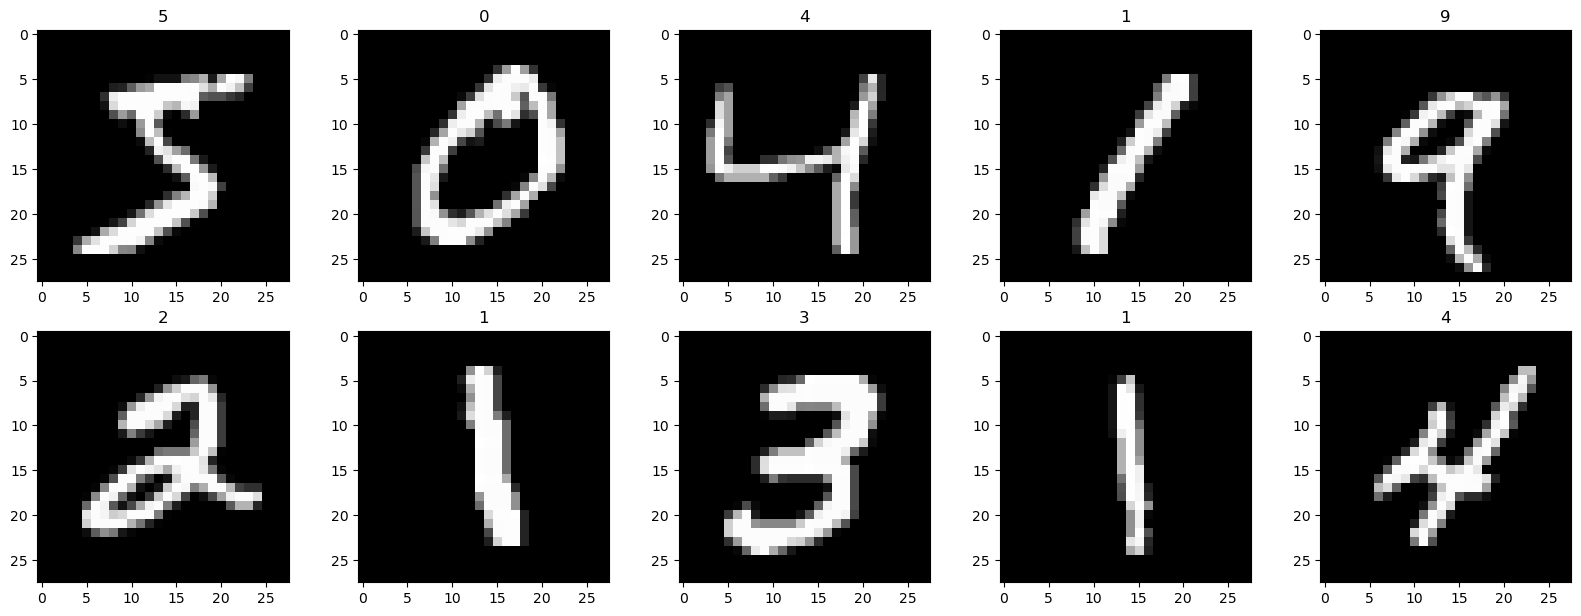

In [96]:
# let's do some visualization
plt.figure(figsize=(20 , 15))
for i in range(0 , 10):
    plt.subplot(4 , 5 , i+1)
    plt.imshow(x_train[i] , cmap='gray')
    plt.title(np.argmax(y_train[i]))

plt.show()
    

In [97]:
# normalize the data 
train_max = x_train.max()
x_train_normlized = x_train/ train_max
x_test_normlized = x_test/ train_max

In [101]:
# always test
(x_train_normlized.max(), x_test_normlized.max())

(1.0, 1.0)

In [128]:
# create an empty model
model = Sequential()

# build the model

# The first convolutional and average pooling layer

# Convolution
model.add(Conv2D(filters = 6 , kernel_size=(5,5) , padding='same' , strides=(1, 1) , activation='relu' , input_shape=(28,28,1)))
#Pooling
model.add(AveragePooling2D(pool_size=(2,2) , strides=(2,2)))

# The second convolutional and average pooling layer

# Convolution
model.add(Conv2D(filters = 16 , kernel_size=(5,5) , padding='valid' , strides=(1, 1) , activation='relu'))
# Pooling
model.add(AveragePooling2D(pool_size=(2,2) , strides=(2,2)))

# The flattening convolutional layer 
model.add(Flatten())

#The first fully connected layer with 120 neurons 
model.add(Dense(units=120 , activation='relu'))

#The second fully connected layer with 10 neurons 
model.add(Dense(units=84 , activation='relu'))

#The softmax classifier with 10 neurons
model.add(Dense(units=10 , activation='softmax'))

In [129]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics ='accuracy')

In [130]:
# model structure
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_16 (Aver  (None, 14, 14, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_17 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_17 (Aver  (None, 5, 5, 16)          0         
 agePooling2D)                                                   
                                                                 
 flatten_8 (Flatten)         (None, 400)               0         
                                                                 
 dense_24 (Dense)            (None, 120)              

In [131]:
# fit the model
history = model.fit(x_train_normlized,
          y_train,
          batch_size=128,
          epochs=10,
         validation_data=(x_test_normlized , y_test))

Epoch 1/10
469/469 [==============================] - 6s 10ms/step - loss: 0.3798 - accuracy: 0.8913 - val_loss: 0.1244 - val_accuracy: 0.9623
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1007 - accuracy: 0.9695 - val_loss: 0.0742 - val_accuracy: 0.9766
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0693 - accuracy: 0.9790 - val_loss: 0.0545 - val_accuracy: 0.9816
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0540 - accuracy: 0.9832 - val_loss: 0.0432 - val_accuracy: 0.9847
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0461 - accuracy: 0.9860 - val_loss: 0.0390 - val_accuracy: 0.9873
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0390 - accuracy: 0.9875 - val_loss: 0.0474 - val_accuracy: 0.9842
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0335 - accuracy: 0.9892 - val_loss: 0.0331 - val_accuracy: 0.9896
Ep

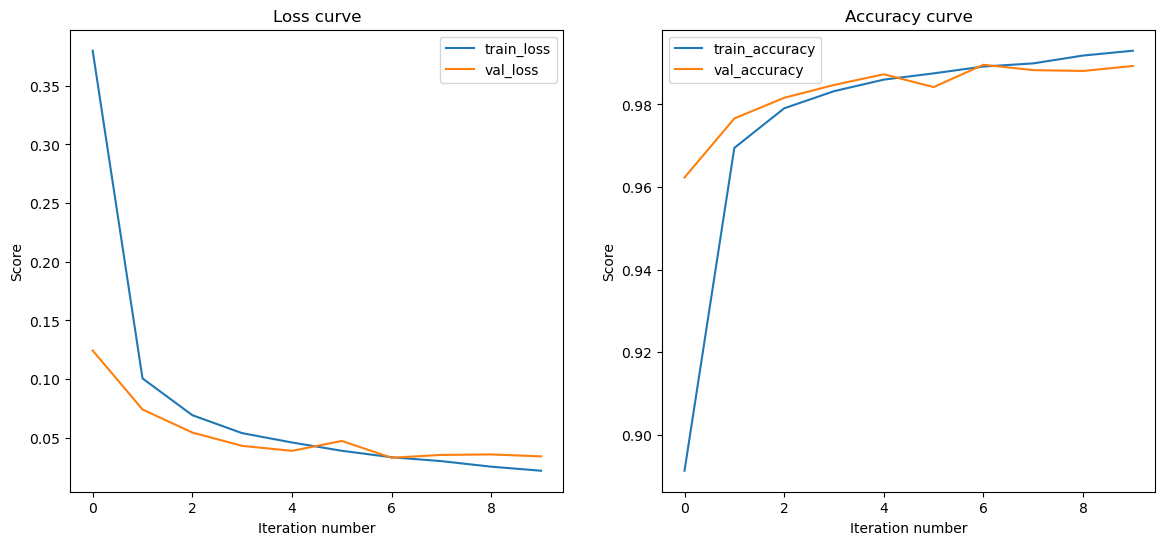

In [132]:
# Training track

# Loss curve 
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'] , label='train_loss')
plt.plot(history.history['val_loss'] ,label='val_loss')
plt.title('Loss curve')
plt.xlabel('Iteration number')
plt.ylabel('Score')
plt.legend()

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'] , label='train_accuracy')
plt.plot(history.history['val_accuracy'] , label='val_accuracy')
plt.title('Accuracy curve')
plt.xlabel('Iteration number')
plt.ylabel('Score')
plt.legend()

plt.show()

In [133]:
# let's do some predictions
y_pred = model.predict(x_test_normlized)

313/313 [==============================] - 1s 1ms/step


In [134]:
# check the output of the final layer(sotfmax layer)
y_pred[0]

array([2.0805324e-09, 1.9205290e-06, 5.3526929e-07, 1.9707757e-06,
       2.6168458e-08, 3.6119863e-07, 2.0179584e-11, 9.9997389e-01,
       4.4233147e-08, 2.1256810e-05], dtype=float32)

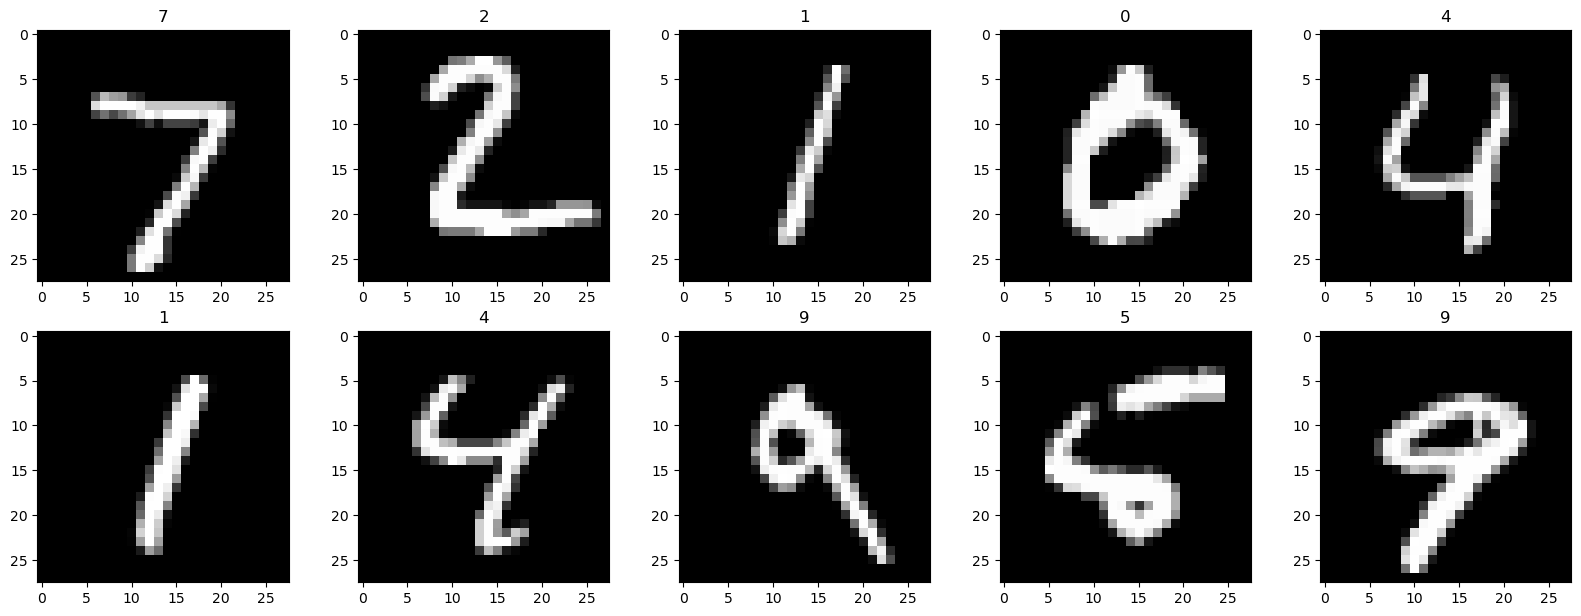

In [135]:
# let's do some visualization
plt.figure(figsize=(20 , 15))
for i in range(0 , 10):
    plt.subplot(4 , 5 , i+1)
    plt.imshow(x_test[i] , cmap='gray')
    plt.title(np.argmax(y_pred[i]))

plt.show()

THE END 